In [1]:
from __future__ import print_function
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import argparse
import random as rng
import math

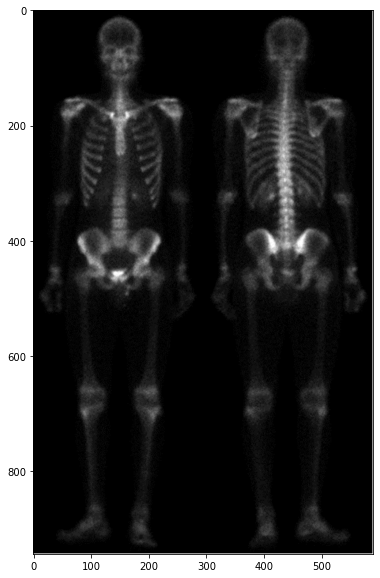

In [2]:
image = cv2.imread('D:/Education/_Masters/3rd Semester - Spring 2021/Introduction to Robot Vision System/Assignment 3/paperPhoto1.bmp', 0)

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.show(block = True)

In [3]:
print(image.shape)

(944, 590)


In [4]:
# Flattening it to a one-dimensional array

flat = image.flatten()

In [5]:
print(flat.shape)

(556960,)


In [6]:
def get_histogram(image, bins):
    # array with size of bins, set to zeros
    histogram = np.zeros(bins)
    
    # loop through pixels and sum up counts of pixels
    for pixel in image:
        histogram[pixel] += 1
    
    # return our final result
    return histogram

def plot_histogram(y):
    xaxis = np.arange(1, 257, 1)
    plt.bar(xaxis, y)

In [7]:
# execute our histogram function
hist = get_histogram(flat, 256)

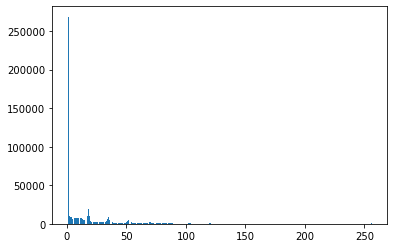

In [8]:
plot_histogram(hist)

In [9]:
print(image.shape)

(944, 590)


In [10]:
print(type(flat[0]))

<class 'numpy.uint8'>


In [11]:
def contrast_stretching(z, a, b, z1, zk):

    new_array = np.copy(z)
        
    for i,value in enumerate(z):
        if value>=a and value<=b:
            new_pixel_value = (((zk - z1)/(b-a))*value) + ((z1*b - zk*a)/(b-a))

            new_array[i] = new_pixel_value

    return new_array

In [13]:
new_image = contrast_stretching(flat, 0, 100, 0, 200)

In [14]:
print(new_image.shape)

(556960,)


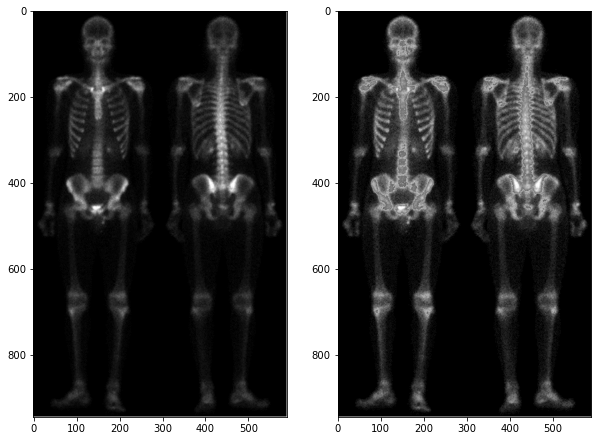

In [15]:
#Reshaping and plotting

img_new = np.reshape(new_image, image.shape)

# Plotting the result

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)

# display the old image
fig.add_subplot(1,2,1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# display the new image
fig.add_subplot(1,2,2)
plt.imshow(cv2.cvtColor(img_new, cv2.COLOR_BGR2RGB))

plt.show(block=True)